In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631


In [6]:
#In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# Create a set of random latitude and longitude combinations.When we run this cell, the output is a zip object in memory.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

9.575122892883968 -176.60134974598236
13.3472283844428 -24.27781320921366
-69.47319682200416 -102.62033542528968
-54.82547608566661 -148.99909930597076
73.52846605791348 -72.89794377940677
61.302308512073466 111.31914747992266
-32.301415218238674 -141.83363836584465
-58.42104965506945 22.317803354257478
-21.662370474592365 94.91368028157996
-73.96831003026551 -113.77089762318775
-75.51519541027471 116.13214897631036
-64.58506989015342 -76.80270131360933
-86.67735906416145 151.87777101099948
73.93237798896058 135.96939519459897
32.19505144137321 40.81673518826295
53.2699910680617 -116.22222069424552
-42.68109654032553 51.34697462428181
18.53853113314868 -51.607340514660905
-8.424336465066602 -78.45156907934044
-35.29454382279124 -172.17783390978167
83.26573340909093 -40.374538717111875
-5.614324991324466 115.23398982749814
-36.588450503232345 -87.5494439754907
-62.828664012421314 85.25235950616366
-56.888387712932705 92.54749796538403
65.44670168589431 -162.04366868671775
-26.3100236152

-58.51967370754679 100.21706940684845
26.12581224193842 -12.009907506111404
-72.37761944576127 -115.94331634208694
-42.05191329572409 -58.35201302351305
-72.39976968368657 38.69576946062455
67.07781687833503 123.2166556343858
84.0648602321902 90.22377765148644
-11.200882260353126 80.25176479085076
52.644145730043874 49.121244632736165
6.953499685196164 114.1964811499289
21.087076478545768 -110.2978237627608
-32.847630197036196 -56.43725419819951
10.664391299178419 69.04531594962305
-83.40682493276061 -32.42220189802043
69.6273859144865 33.27044447481262
11.283761866256356 -61.70037214499271
44.95807876054232 -3.767762278377319
87.38526620487673 -16.01824458328892
81.74890049043879 -161.13418299355016
-45.761977436709756 -8.572537118202206
1.7102826630668062 123.36295655593409
83.42914241740107 -147.46886977355797
58.09510114760448 27.940043248215034
-46.7422162335563 87.04888243213048
-62.48838041825897 64.1926840169362
11.717319354104802 -30.968597559825554
1.867857925588794 -121.6246

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [10]:
#Some of this code should look familiar, but let's break it down:We create a cities list to store city names.We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | chernyshevskiy
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | turayf
Processing Record 14 of Set 1 | edson
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | viru
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | kalianget
Processing Record 21 of Set 1 | lebu
P

Processing Record 34 of Set 4 | vanimo
Processing Record 35 of Set 4 | yeppoon
Processing Record 36 of Set 4 | narsaq
Processing Record 37 of Set 4 | guerrero negro
Processing Record 38 of Set 4 | krasnoselkup
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | fuerte olimpo
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | neiafu
Processing Record 47 of Set 4 | pinawa
Processing Record 48 of Set 4 | svetlogorsk
Processing Record 49 of Set 4 | byron bay
Processing Record 50 of Set 4 | pingyi
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | erzin
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | por

Processing Record 25 of Set 8 | laurel
Processing Record 26 of Set 8 | chaozhou
Processing Record 27 of Set 8 | beinamar
Processing Record 28 of Set 8 | podosinovets
Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | yarkovo
Processing Record 31 of Set 8 | primo tapia
Processing Record 32 of Set 8 | agadez
Processing Record 33 of Set 8 | gallatin
Processing Record 34 of Set 8 | kruisfontein
Processing Record 35 of Set 8 | arman
Processing Record 36 of Set 8 | mazara del vallo
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | dalton
Processing Record 39 of Set 8 | brewster
Processing Record 40 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 41 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | teacapan
Processing Record 45 of Set 8 | sibu
Processing Record 46 of Set 8 | va

Processing Record 12 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 13 of Set 12 | ketchikan
Processing Record 14 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 15 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 16 of Set 12 | whitehorse
Processing Record 17 of Set 12 | sijunjung
Processing Record 18 of Set 12 | beira
Processing Record 19 of Set 12 | umm lajj
Processing Record 20 of Set 12 | merano
Processing Record 21 of Set 12 | tateyama
Processing Record 22 of Set 12 | gravelbourg
Processing Record 23 of Set 12 | tevaitoa
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | tigil
Processing Record 26 of Set 12 | ozernovskiy
Processing Record 27 of Set 12 | juegang
Processing Record 28 of Set 12 | northam
Processing Record 29 of Set 12 | migori
Processing Record 30 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 31 of Set 12 | kiunga
Processing Record 32 of Set 12 |

In [12]:
len(city_data)

567

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,84.18,75,40,4.00,US,2021-07-21 00:14:46
1,Sao Filipe,14.8961,-24.4956,74.66,82,53,6.62,CV,2021-07-21 00:17:02
2,Punta Arenas,-53.1500,-70.9167,35.71,93,0,12.66,CL,2021-07-21 00:10:21
3,Mataura,-46.1927,168.8643,44.47,82,97,2.95,NZ,2021-07-21 00:14:13
4,Clyde River,70.4692,-68.5914,33.58,97,100,11.43,CA,2021-07-21 00:14:40
5,Chernyshevskiy,63.0128,112.4714,69.35,52,9,5.14,RU,2021-07-21 00:19:05
6,Rikitea,-23.1203,-134.9692,71.87,61,98,22.95,PF,2021-07-21 00:14:26
7,Bredasdorp,-34.5322,20.0403,44.28,85,18,9.73,ZA,2021-07-21 00:14:54
8,Albany,42.6001,-73.9662,77.79,85,40,5.32,US,2021-07-21 00:10:36
9,Bluff,-46.6000,168.3333,44.80,77,100,7.85,NZ,2021-07-21 00:14:12


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-07-21 00:14:46,22.0752,-159.3190,84.18,75,40,4.00
1,Sao Filipe,CV,2021-07-21 00:17:02,14.8961,-24.4956,74.66,82,53,6.62
2,Punta Arenas,CL,2021-07-21 00:10:21,-53.1500,-70.9167,35.71,93,0,12.66
3,Mataura,NZ,2021-07-21 00:14:13,-46.1927,168.8643,44.47,82,97,2.95
4,Clyde River,CA,2021-07-21 00:14:40,70.4692,-68.5914,33.58,97,100,11.43
5,Chernyshevskiy,RU,2021-07-21 00:19:05,63.0128,112.4714,69.35,52,9,5.14
6,Rikitea,PF,2021-07-21 00:14:26,-23.1203,-134.9692,71.87,61,98,22.95
7,Bredasdorp,ZA,2021-07-21 00:14:54,-34.5322,20.0403,44.28,85,18,9.73
8,Albany,US,2021-07-21 00:10:36,42.6001,-73.9662,77.79,85,40,5.32
9,Bluff,NZ,2021-07-21 00:14:12,-46.6000,168.3333,44.80,77,100,7.85


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

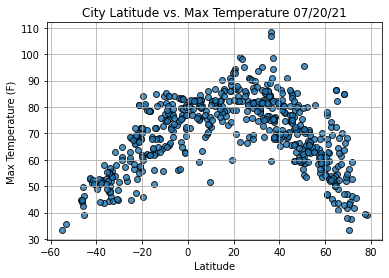

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

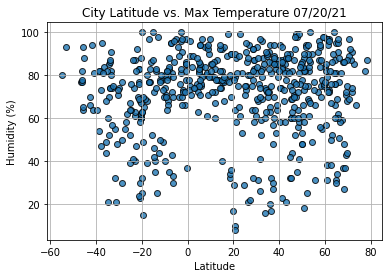

In [19]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

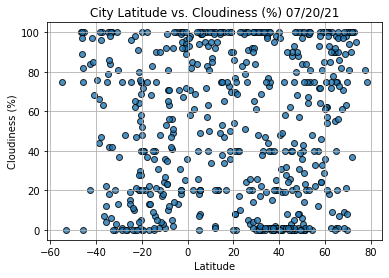

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

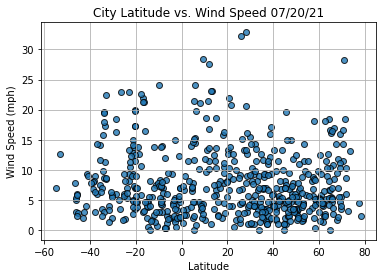

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                         Viru
Country                        PE
Date          2021-07-21 00:17:15
Lat                       -8.4167
Lng                        -78.75
Max Temp                     65.5
Humidity                       79
Cloudiness                     10
Wind Speed                   4.09
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
562     True
563     True
564     True
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-07-21 00:14:46,22.0752,-159.3190,84.18,75,40,4.00
1,Sao Filipe,CV,2021-07-21 00:17:02,14.8961,-24.4956,74.66,82,53,6.62
4,Clyde River,CA,2021-07-21 00:14:40,70.4692,-68.5914,33.58,97,100,11.43
5,Chernyshevskiy,RU,2021-07-21 00:19:05,63.0128,112.4714,69.35,52,9,5.14
8,Albany,US,2021-07-21 00:10:36,42.6001,-73.9662,77.79,85,40,5.32
...,...,...,...,...,...,...,...,...,...
562,Palmer,US,2021-07-21 00:12:59,42.1584,-72.3287,80.28,73,75,1.01
563,Key Largo,US,2021-07-21 00:21:58,25.0865,-80.4473,84.20,75,79,8.61
564,Lamar,US,2021-07-21 00:21:59,33.6668,-95.5836,86.16,60,1,6.91
565,Roald,NO,2021-07-21 00:15:39,62.5833,6.1333,52.32,76,90,2.30


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

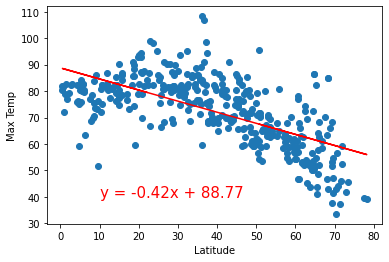

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

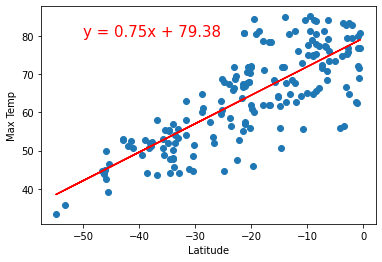

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

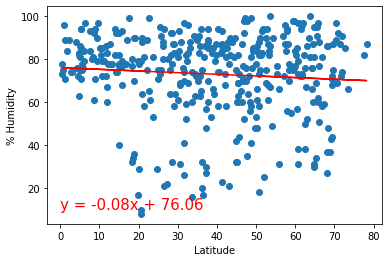

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(0,10))

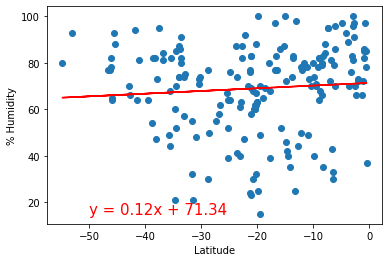

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

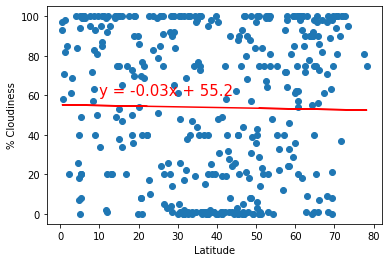

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

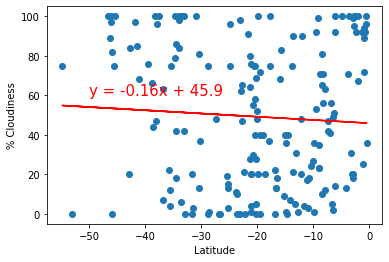

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

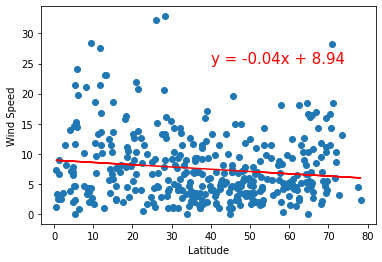

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))


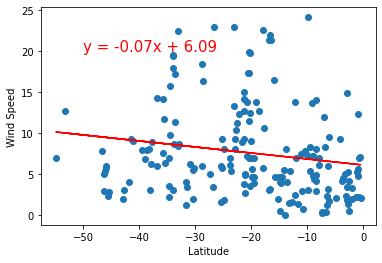

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))